In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


If the independent feature is highly co-orelated like above 95% than we keep one of the feature 

In [5]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


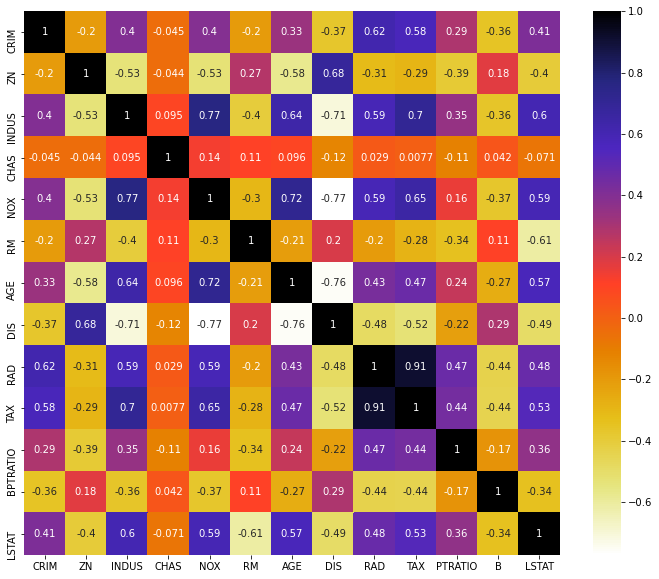

In [10]:
import seaborn as sns

# Pearson Correlation  = Range from -1 to +1 
plt.figure(figsize=(12,10))
cor = X_train.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()          # set of all the names of correlated columns
    corr_matirx = dataset.corr()
    for i in range(len(corr_matirx.columns)):
        for j in range(i):
            if (corr_matirx.iloc[i,j])>threshold:       # we are interested in absolute coeff values
                colname = corr_matirx.columns[i]      # getting the name of column
                col_corr.add(colname)                 # add in set so that the duplicate values doesnot go with respect to cols
    return col_corr

val = -85

abs_val = abs(val)

print(abs_val)

out: 85

###### With the following function we can select highly correlated features
##### it will remove the first feature that is correlated with anything other feature




<b>---------------------------For neglecting -ve correlation we convert it into +ve using abs---------------------------</b>

Example: just add abs


    def correlation(dataset, threshold):
        col_corr = set()          # set of all the names of correlated columns
        corr_matirx = dataset.corr()
        for i in range(len(corr_matirx.columns)):
            for j in range(i):
                if abs(corr_matirx.iloc[i,j])>threshold:       # we are interested in absolute coeff values
                    colname = corr_matirx.columns[i]      # getting the name of column
                    col_corr.add(colname)            # add in set so that the duplicate vals doesnot go with respect to cols
        return col_corr

In [27]:
corr_feature = correlation(X_train,0.7) # Only done in X_train
len(set(corr_feature))

3

In [28]:
corr_feature

{'AGE', 'NOX', 'TAX'}

### Droping Highly correlated values

In [29]:
X_train.drop(corr_feature, axis=1)
X_test.drop(corr_feature, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,6.416,2.6463,5.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,6.758,4.0776,4.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,5.983,1.8681,4.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,6.065,5.2873,4.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,6.297,2.3682,24.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,4.628,1.5539,24.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,6.461,2.0026,24.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,6.657,1.5275,24.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,6.015,4.4272,3.0,18.5,395.99,12.86
